In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install fredapi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from datetime import datetime


# Set the maximum number of columns to display in a DataFrame
pd.set_option('display.max_columns', 500)

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_api = ''

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()
fred_api = secrets.get_secret('FredAPI')

# 1. Create Fred Object

In [4]:
fred = Fred(api_key = fred_api)

# 2. Search Fred for Economic Data

In [5]:
df = fred.search('S&P', order_by='popularity')

In [6]:
df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-10-18,2023-10-18,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-10-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-18 09:15:01-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-10-18,2023-10-18,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-10-18,2023-10-18,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-10-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-18 09:14:14-05:00,84,This data represents the effective yield of th...
SP500,SP500,2023-10-18,2023-10-18,S&P 500,2013-10-18,2023-10-17,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-10-17 19:11:01-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-10-18,2023-10-18,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


# 3. Pull & Plot Raw Data

In [7]:
SP500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

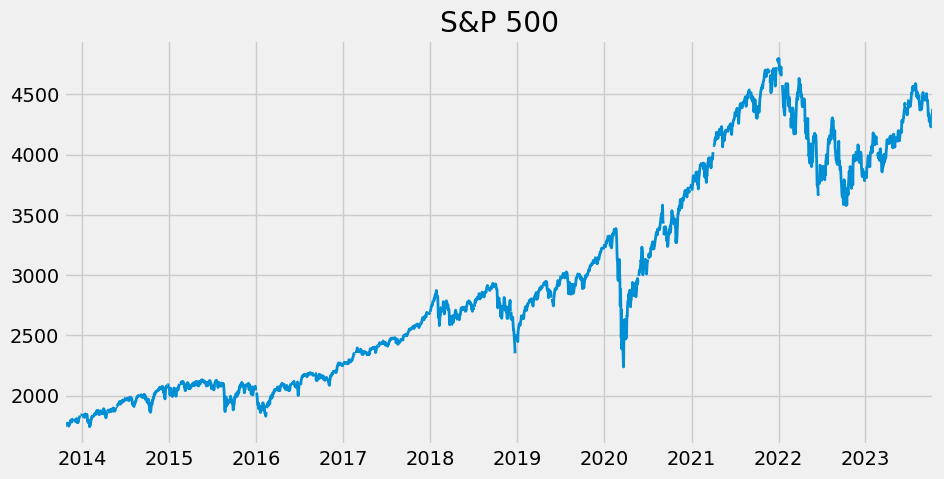

In [8]:
SP500.plot(figsize=(10,5),
          title = 'S&P 500',
          lw = 2)

# 4. Pull & Request Multiple Data Series

In [9]:
unemployement_resuts = fred.search('unemployment',)
unemployement_resuts

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-10-18,2023-10-18,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-10-18,2023-10-18,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-10-06 07:45:02-05:00,56,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-10-18,2023-10-18,Unemployment Level,1948-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-10-06 07:46:04-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2023-10-18,2023-10-18,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,68,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-10-18,2023-10-18,Continued Claims (Insured Unemployment),1967-01-07,2023-09-30,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-10-12 07:33:03-05:00,72,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS13023705,LNS13023705,2023-10-18,2023-10-18,Unemployment Level - Job Leavers,1967-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-10-06 07:46:40-05:00,6,The series comes from the 'Current Population ...
LRHUTTTTMXM156S,LRHUTTTTMXM156S,2023-10-18,2023-10-18,Harmonized Unemployment: Monthly Rates: Total:...,1987-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-12 11:37:05-05:00,6,OECD Descriptor ID: LRHUTTTT OECD unit ID: PC ...
LNS13026637,LNS13026637,2023-10-18,2023-10-18,Unemployment Level - Persons Who Completed Tem...,1994-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-10-06 07:46:47-05:00,6,The series comes from the 'Current Population ...


<Axes: >

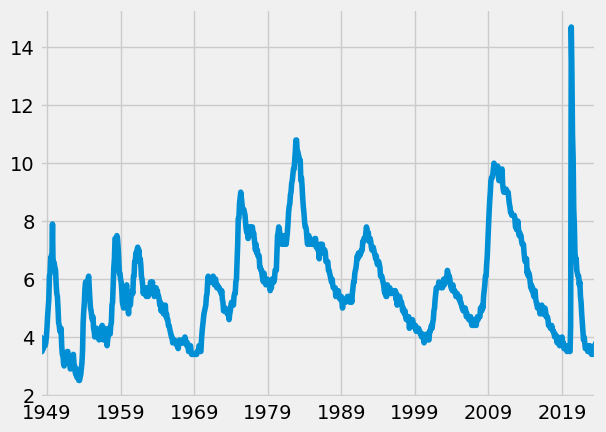

In [10]:
unrate = fred.get_series('UNRATE')
unrate.plot()

In [11]:
df_unemployment = fred.search('unemployment rate state', 
                              filter = ('frequency','Monthly'))


In [12]:
df_unemployment = df_unemployment.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
df_unemployment = df_unemployment.loc[df_unemployment['title'].str.contains('Unemployment Rate')]

In [13]:
df_unemployment

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-10-18,2023-10-18,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-10-18,2023-10-18,Unemployment Rate - Black or African American,1972-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:05-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-10-18,2023-10-18,Unemployment Rate in California,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:02-05:00,59,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-10-18,2023-10-18,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-10-18,2023-10-18,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,9,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSOUUR,CSOUUR,2023-10-18,2023-10-18,Unemployment Rate in South Census Region,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:14-05:00,4,None
LRUN24TTUSM156S,LRUN24TTUSM156S,2023-10-18,2023-10-18,Unemployment Rate: Aged 15-24: All Persons for...,1960-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:58:20-05:00,3,OECD Descriptor ID: LRUN24TT OECD unit ID: PC ...
LNS14023705,LNS14023705,2023-10-18,2023-10-18,Unemployment Rate - Job Leavers,1967-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:55-05:00,3,The series comes from the 'Current Population ...


In [14]:
df_unemployment.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'LNS14000002', 'NYUR', 'LNS14000024', 'U2RATE', 'FLUR',
       'LNS14000031', 'LNS14000009', 'LNS14000001', 'LNS14024887',
       'LNS14000003', 'MIUR', 'ALUR', 'OHUR', 'LNS14027662', 'COUR',
       'LNS14027660', 'ILUR', 'PAUR', 'NCUR', 'LRUN64TTUSM156S', 'NJUR',
       'MAUR', 'MNUR', 'KYUR', 'LNS14027659', 'GAUR', 'AKUR', 'ORUR', 'AZUR',
       'NMUR', 'MDUR', 'WIUR', 'VAUR', 'WAUR', 'TNUR', 'SCUR', 'MOUR',
       'LNS14032183', 'ARUR', 'INUR', 'NDUR', 'WVUR', 'IAUR', 'OKUR',
       'LNS14000012', 'LAUR', 'LASMT261982000000003', 'HIUR', 'PRUR',
       'LNS14000060', 'LASMT391746000000003', 'LNS14000036', 'NVUR', 'CTUR',
       'MTUR', 'UTUR', 'MSUR', 'DCUR', 'KSUR', 'IDUR', 'WYUR', 'DEUR', 'MEUR',
       'LNS14000018', 'VTUR', 'RIUR', 'NEUR', 'NHUR', 'LNS14200000', 'SDUR',
       'LNS14000028', 'LNS14027689', 'CMWRUR', 'LNS14000032',
       'LRUNTTTTUSM156S', 'CNERUR', 'LNS14100000', 'LNS1

In [15]:
len(df_unemployment.index)

96

In [16]:
#Drop non-state columns
df_unemployment = df_unemployment.drop(['UNRATE','U2RATE','LNS14000006', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000002', 'LNS14000024', 
                     'LNS14000031', 'LNS14000009', 'LNS14000001', 'LNS14024887','LNS14000003', 'LNS14027662',
                     'LNS14027660', 'LRUN64TTUSM156S', 'LNS14027659', 'LNS14032183', 'LNS14000012',  
                      'LASMT261982000000003','LNS14000060', 'LASMT391746000000003', 'LNS14000036',
                      'LNS14000018',  'LNS14200000','LNS14000028', 'LNS14027689', 'LNS14000032', 
                      'LRUNTTTTUSM156S', 'LNS14100000', 'LNS14024230', 'LNS14000315', 'LNS14000089', 
                      'LNS14000026', 'LNS14000048', 'LNS14000327', 'LRUN24TTUSM156S', 'LNS14023705',
                      'LNS14000029', 'LNS14000025'])

In [17]:
len(df_unemployment.index)

57

In [18]:
### Create a list of series for each state's unemployement rate
all_results=[]

for myid in df_unemployment.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    




In [19]:
#Check which  48th index of the list
all_results[47]

,VTUR
1976-01-01,8.6
1976-02-01,8.6
1976-03-01,8.6
1976-04-01,8.6
1976-05-01,8.5
...,...
2023-04-01,2.4
2023-05-01,2.1
2023-06-01,1.9
2023-07-01,1.8


In [20]:
#Take all the results in the list and merge them togeather
unemployment_states = pd.concat(all_results, axis=1)

<Axes: >

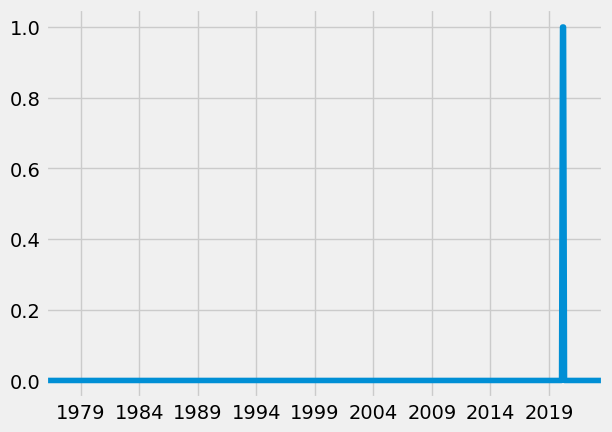

In [21]:
#graph of NaN values by year
unemployment_states.isna().sum(axis =1).plot()

In [22]:
#drop NaN values
unemployment_states = unemployment_states.dropna()

In [23]:
### Naming the state names fully
id_to_state = df_unemployment['title'].str.replace('Unemployment Rate in','').to_dict()
unemployment_states.columns = [id_to_state[c] for c in unemployment_states.columns]

In [24]:
unemployment_states

,California,Texas,New York,Florida,Michigan,Alabama,Ohio,Colorado,Illinois,Pennsylvania,North Carolina,New Jersey,Massachusetts,Minnesota,Kentucky,Georgia,Alaska,Oregon,Arizona,New Mexico,Maryland,Wisconsin,Virginia,Washington,Tennessee,South Carolina,Missouri,Arkansas,Indiana,North Dakota,West Virginia,Iowa,Oklahoma,Louisiana,Hawaii,Puerto Rico,Nevada,Connecticut,Montana,Utah,Mississippi,the District of Columbia,Kansas,Idaho,Wyoming,Delaware,Maine,Vermont,Rhode Island,Nebraska,New Hampshire,South Dakota,Midwest Census Region,Northeast Census Region,West Census Region,New England Census Division,South Census Region
1976-01-01,9.2,5.8,10.3,9.7,9.9,6.6,8.1,5.8,6.6,8.0,6.4,10.3,10.5,6.0,5.6,8.4,7.1,9.5,10.2,8.6,6.4,5.8,6.1,8.5,6.0,7.4,5.9,7.3,6.6,3.4,7.5,4.3,5.8,6.3,9.8,19.6,9.2,9.8,5.8,5.8,6.7,8.7,4.2,5.6,4.1,8.0,8.7,8.6,7.8,3.3,6.5,3.3,6.8,9.6,8.6,9.6,6.9
1976-02-01,9.2,5.8,10.3,9.7,9.9,6.6,8.1,5.7,6.6,8.1,6.4,10.3,10.5,6.0,5.6,8.4,7.1,9.5,10.2,8.7,6.4,5.8,6.1,8.5,6.0,7.4,5.9,7.3,6.6,3.4,7.5,4.3,5.8,6.3,9.8,19.5,9.2,9.8,5.8,5.9,6.7,8.7,4.2,5.6,4.1,8.0,8.7,8.6,7.8,3.3,6.5,3.3,6.8,9.6,8.6,9.6,6.9
1976-03-01,9.1,5.9,10.2,9.6,9.9,6.6,8.1,5.7,6.6,8.1,6.4,10.3,10.5,5.9,5.6,8.4,7.0,9.4,10.1,8.7,6.4,5.7,6.1,8.4,6.0,7.3,5.9,7.3,6.5,3.4,7.5,4.3,5.8,6.3,9.8,19.3,9.2,9.8,5.8,5.8,6.6,8.6,4.2,5.6,4.1,8.0,8.6,8.6,7.7,3.3,6.5,3.2,6.8,9.6,8.6,9.6,6.9
1976-04-01,9.1,5.9,10.2,9.5,9.8,6.5,8.0,5.6,6.6,8.1,6.3,10.3,10.3,5.8,5.6,8.3,6.9,9.2,10.0,8.6,6.4,5.6,6.0,8.5,6.0,7.2,6.0,7.2,6.3,3.5,7.5,4.2,5.8,6.4,9.7,19.0,9.0,9.6,5.8,5.8,6.4,8.5,4.2,5.6,4.0,8.1,8.6,8.6,7.7,3.2,6.5,3.1,6.7,9.5,8.5,9.4,6.8
1976-05-01,9.0,5.9,10.1,9.3,9.6,6.4,7.8,5.6,6.6,8.1,6.1,10.3,10.1,5.7,5.5,8.1,6.9,9.1,9.8,8.6,6.5,5.5,5.9,8.5,5.9,7.0,6.0,7.1,6.0,3.6,7.4,4.1,5.7,6.5,9.4,18.9,8.9,9.4,5.8,5.7,6.3,8.4,4.2,5.6,3.9,8.3,8.5,8.5,7.7,3.1,6.5,3.1,6.6,9.5,8.5,9.3,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,4.5,4.0,4.0,2.6,3.8,2.2,3.7,2.8,4.2,4.1,3.4,3.5,3.1,2.8,3.7,3.1,3.7,4.0,3.4,3.5,2.5,2.4,3.1,4.3,3.3,3.1,2.5,2.8,3.0,2.1,3.3,2.7,2.9,3.6,3.3,6.0,5.4,3.8,2.3,2.3,3.4,5.0,2.9,2.6,3.5,4.3,2.4,2.4,3.0,2.0,2.1,1.9,3.3,3.7,4.0,3.2,3.3
2023-05-01,4.5,4.1,3.9,2.6,3.7,2.2,3.6,2.8,4.1,4.0,3.4,3.6,2.8,2.9,3.8,3.2,3.6,3.7,3.4,3.5,2.4,2.4,2.9,4.1,3.3,3.1,2.5,2.7,3.1,2.1,3.3,2.7,2.8,3.6,3.1,6.1,5.4,3.7,2.3,2.3,3.2,5.1,2.9,2.6,3.3,4.2,2.4,2.1,3.0,1.9,1.9,1.9,3.2,3.6,4.0,3.0,3.3
2023-06-01,4.6,4.1,3.9,2.6,3.6,2.2,3.4,2.8,4.0,3.8,3.3,3.7,2.6,2.9,3.8,3.2,3.7,3.5,3.5,3.5,2.0,2.5,2.7,3.8,3.2,3.1,2.6,2.6,3.2,2.0,3.3,2.7,2.7,3.6,3.0,6.1,5.4,3.7,2.4,2.4,3.1,5.1,2.8,2.7,3.1,4.2,2.4,1.9,2.9,1.9,1.8,1.8,3.2,3.5,4.0,2.8,3.2
2023-07-01,4.6,4.1,3.9,2.7,3.6,2.1,3.3,2.9,4.0,3.5,3.3,3.9,2.5,3.0,3.9,3.2,3.8,3.4,3.6,3.6,1.8,2.6,2.5,3.6,3.1,3.1,2.7,2.6,3.3,2.0,3.4,2.7,2.7,3.4,2.8,6.2,5.3,3.6,2.5,2.4,3.0,5.0,2.7,2.8,3.0,4.1,2.4,1.8,2.8,2.0,1.7,1.9,3.2,3.5,4.0,2.7,3.2


In [25]:
#plot unemployemnt rate by states
px.line(unemployment_states)

## Pull May 2020 Unemployment Rate Per States

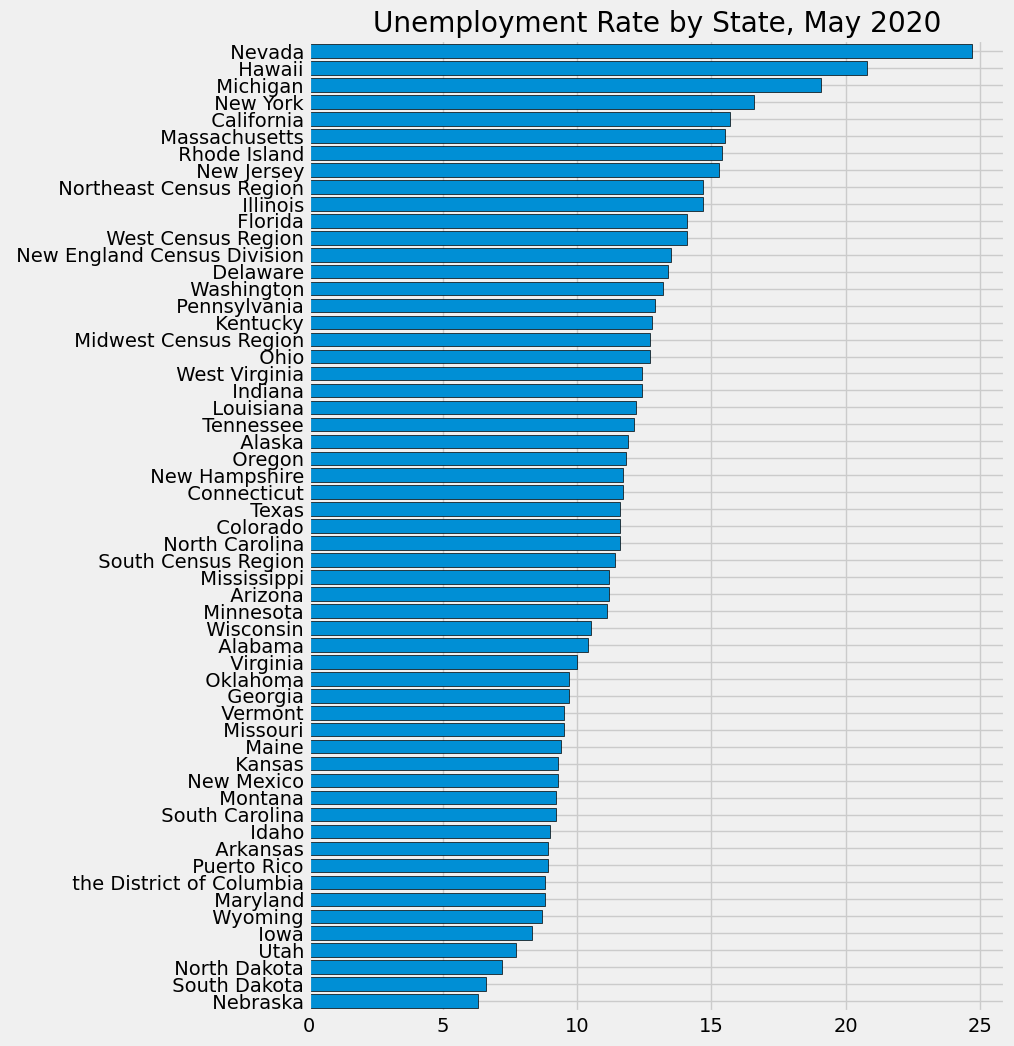

In [26]:
ax = unemployment_states.loc[unemployment_states.index == '2020-05-01'].T\
                                                                  .sort_values('2020-05-01')\
                                                                  .plot(kind= 'barh', figsize=(8, 12), width = 0.8,edgecolor = 'black',\
                                                                   title= 'Unemployment Rate by State, May 2020');
ax.legend().remove()
plt.show()

# Pull Participation rate

In [27]:
df_part= fred.search('participation rate state', 
                              filter = ('frequency','Monthly'))
df_part= df_part.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

#Drop non-state columns
df_part = df_part.drop(['CIVPART', 'LNS11300060',
 'LNS11300002',
 'LNS11300001',
 'LNS11324230',
 'LNS11300012',
 'LRAC25MAUSM156S',
 'LNS11300036',
 'LNS11300006',
 'LNS11300028',
 'LRAC25FEUSM156S',
 'LNS11300003',
 'LNS11300031',
 'LNS11300009',
 'LNS11327660',
 'LNS11300032',
 'LNS11300026',
 'LRIN64TTUSM156S',
 'LNS11300029',
 'LNS11300025',
 'LRAC64TTUSM156S',
 'LNS11327659',
 'LNS11327689',
 'LRAC55TTUSM156S',
 'LNS11300018',
 'LNS11300015',
 'LRIN25MAUSM156S',
 'LRAC55MAUSM156S',
 'LRAC24MAUSM156S',
 'LRAC55FEUSM156S',
 'LRAC24FEUSM156S',
 'LRIN24FEUSM156S',
 'LRIN24MAUSM156S',
 'LRAC74MAUSM156S',
 'LRIN55FEUSM156S',
 'LRAC74FEUSM156S',
 'LRIN74FEUSM156S',
 'LRIN55MAUSM156S',
 'LRIN74MAUSM156S',
 'LRIN64FEUSM156S',
 'LRAC64FEUSM156S',
 'LRAC64MAUSM156S',
 'LRIN64MAUSM156S',
 'LRIN25FEUSM156S',
 'LRAC24TTUSM156S',
 'LRIN55TTUSM156S',
 'LRAC25TTUSM156S',
 'LRIN24TTUSM156S',
 'LRAC74TTUSM156S',
 'LRIN25TTUSM156S',
 'LRACTTFEUSM156S',
 'LRACTTMAUSM156S',
 'LRINTTMAUSM156S',
 'LRINTTFEUSM156S',
 'LRIN74TTUSM156S',
 'LRACTTTTUSM156S',
 'LRINTTTTUSM156S',
'LNS11327662'])


In [28]:
df_part['title'].str.replace('Labor Force Participation Rate for','').to_dict()

{'LBSSA21': ' Kentucky',
 'LBSSA01': ' Alabama',
 'LBSSA06': ' California',
 'LBSSA12': ' Florida',
 'LBSSA08': ' Colorado',
 'LBSSA55': ' Wisconsin',
 'LBSSA26': ' Michigan',
 'LBSSA36': ' New York',
 'LBSSA13': ' Georgia',
 'LBSSA39': ' Ohio',
 'LBSSA27': ' Minnesota',
 'LBSSA25': ' Massachusetts',
 'LBSSA23': ' Maine',
 'LBSSA24': ' Maryland',
 'LBSSA48': ' Texas',
 'LBSSA35': ' New Mexico',
 'LBSSA51': ' Virginia',
 'LBSSA19': ' Iowa',
 'LBSSA47': ' Tennessee',
 'LBSSA49': ' Utah',
 'LBSSA28': ' Mississippi',
 'LBSSA54': ' West Virginia',
 'LBSSA37': ' North Carolina',
 'LBSSA45': ' South Carolina',
 'LBSSA34': ' New Jersey',
 'LBSSA02': ' Alaska',
 'LBSSA22': ' Louisiana',
 'LBSSA42': ' Pennsylvania',
 'LBSSA17': ' Illinois',
 'LBSSA16': ' Idaho',
 'LBSSA41': ' Oregon',
 'LBSSA04': ' Arizona',
 'LBSSA18': ' Indiana',
 'LBSSA40': ' Oklahoma',
 'LBSSA31': ' Nebraska',
 'LBSSA15': ' Hawaii',
 'LBSSA53': ' Washington',
 'LBSSA30': ' Montana',
 'LBSSA20': ' Kansas',
 'LBSSA09': ' Conne

In [29]:
part_id_to_state = df_part['title'].str.replace('Labor Force Participation Rate for','').to_dict()

### Create a list of series for each state's unemployement rate
all_results=[]

for myid in df_part.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

#Take all the results in the list and merge them togeather
Participation_states = pd.concat(all_results, axis=1)
    




In [30]:
### Naming the state names fully
Participation_states.columns = [part_id_to_state[c] for c in Participation_states.columns]

In [31]:
### Chnage distrinct of columbia's column name to The district of columbia
Participation_states = Participation_states.rename(columns={' District Of Columbia' : ' The District Of Columbia'})

In [32]:
Participation_states

,Kentucky,Alabama,California,Florida,Colorado,Wisconsin,Michigan,New York,Georgia,Ohio,Minnesota,Massachusetts,Maine,Maryland,Texas,New Mexico,Virginia,Iowa,Tennessee,Utah,Mississippi,West Virginia,North Carolina,South Carolina,New Jersey,Alaska,Louisiana,Pennsylvania,Illinois,Idaho,Oregon,Arizona,Indiana,Oklahoma,Nebraska,Hawaii,Washington,Montana,Kansas,Connecticut,Vermont,The District Of Columbia,Missouri,Arkansas,Nevada,New Hampshire,Delaware,Wyoming,South Dakota,North Dakota,Rhode Island
1976-01-01,60.5,57.0,62.6,55.8,67.2,65.6,61.6,58.0,63.7,61.7,65.6,64.8,62.1,64.3,63.8,60.8,65.9,64.4,59.6,62.8,58.8,52.5,66.5,65.3,61.5,69.0,56.8,58.4,63.0,63.0,62.9,59.5,64.0,59.3,64.9,69.9,60.9,62.7,65.1,64.2,63.6,64.4,60.5,57.9,71.3,65.9,62.7,65.3,64.6,62.6,63.8
1976-02-01,60.3,56.9,62.4,55.7,67.0,65.5,61.5,58.0,63.6,61.7,65.5,64.7,61.9,64.2,63.5,60.5,65.8,64.3,59.4,62.6,58.6,52.4,66.3,65.2,61.4,68.4,56.6,58.3,63.0,62.8,62.7,59.2,63.9,59.2,64.9,69.6,60.7,62.5,65.0,64.1,63.4,64.5,60.3,57.8,70.8,65.6,62.5,64.9,64.4,62.4,63.7
1976-03-01,60.2,56.8,62.2,55.5,66.8,65.4,61.5,58.0,63.5,61.7,65.4,64.6,61.9,64.1,63.4,60.3,65.6,64.2,59.3,62.5,58.5,52.3,66.2,65.0,61.4,67.8,56.5,58.3,62.9,62.7,62.5,59.1,63.8,59.1,64.8,69.6,60.6,62.4,64.9,64.0,63.2,64.5,60.3,57.7,70.5,65.6,62.5,64.7,64.4,62.3,63.6
1976-04-01,60.1,56.8,62.2,55.5,66.6,65.4,61.6,58.0,63.5,61.6,65.4,64.6,61.8,64.1,63.5,60.3,65.5,64.1,59.3,62.5,58.5,52.3,66.2,64.9,61.5,67.9,56.4,58.3,62.9,62.7,62.4,59.1,63.8,59.0,64.8,69.4,60.6,62.3,65.0,64.1,63.5,64.5,60.4,57.7,70.4,65.7,62.4,64.9,64.3,62.5,63.7
1976-05-01,60.1,56.8,62.3,55.4,66.5,65.5,61.7,58.1,63.6,61.6,65.5,64.6,61.7,64.1,63.6,60.3,65.4,64.1,59.4,62.6,58.5,52.2,66.3,64.7,61.6,67.9,56.4,58.3,63.0,62.8,62.5,59.1,63.9,59.0,64.8,69.3,60.7,62.2,65.1,64.3,63.6,64.4,60.6,57.7,70.5,66.0,62.4,65.2,64.3,62.6,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,57.6,56.8,62.4,59.3,68.6,64.8,60.2,60.8,61.2,61.8,68.1,64.8,58.1,65.1,64.1,56.8,66.2,68.3,59.1,69.1,54.5,54.6,60.5,56.3,65.0,65.3,59.5,62.0,64.8,62.5,62.4,61.6,63.6,61.1,69.5,60.4,64.7,62.7,66.7,64.3,63.7,70.6,63.2,57.5,61.4,65.6,59.8,64.5,67.7,69.6,62.9
2023-05-01,57.7,56.9,62.5,59.4,68.7,65.1,60.5,61.0,61.3,62.1,68.2,64.7,58.3,65.3,64.2,56.9,66.5,68.5,59.2,69.4,54.6,54.6,60.6,56.5,65.2,65.3,59.6,62.0,64.7,62.5,62.2,61.7,63.6,61.3,69.5,60.4,64.8,62.8,66.8,64.2,63.7,70.8,63.4,57.5,61.5,65.3,59.9,64.6,67.8,69.7,63.1
2023-06-01,57.8,57.0,62.5,59.5,68.7,65.3,60.7,61.2,61.3,62.2,68.4,64.6,58.4,65.3,64.2,57.0,66.6,68.7,59.3,69.6,54.5,54.6,60.7,56.7,65.4,65.3,59.5,62.0,64.6,62.5,62.0,61.7,63.6,61.4,69.5,60.4,64.7,62.8,66.8,64.1,63.8,70.8,63.6,57.6,61.5,65.2,60.0,64.6,67.9,69.7,63.2
2023-07-01,57.7,57.0,62.4,59.7,68.7,65.5,61.0,61.4,61.4,62.1,68.5,64.5,58.5,65.3,64.2,57.1,66.7,68.8,59.4,69.8,54.4,54.7,60.7,56.9,65.5,65.2,59.3,61.9,64.4,62.4,61.8,61.8,63.6,61.6,69.4,60.3,64.7,62.7,66.8,64.1,63.9,70.8,63.6,57.7,61.6,64.9,60.1,64.6,67.8,69.7,63.3


In [33]:
#Plot Participation Rate by States
px.line(Participation_states)

## Plot Unemployment vs Participation 2020-2023

IndexError: index 50 is out of bounds for axis 0 with size 50

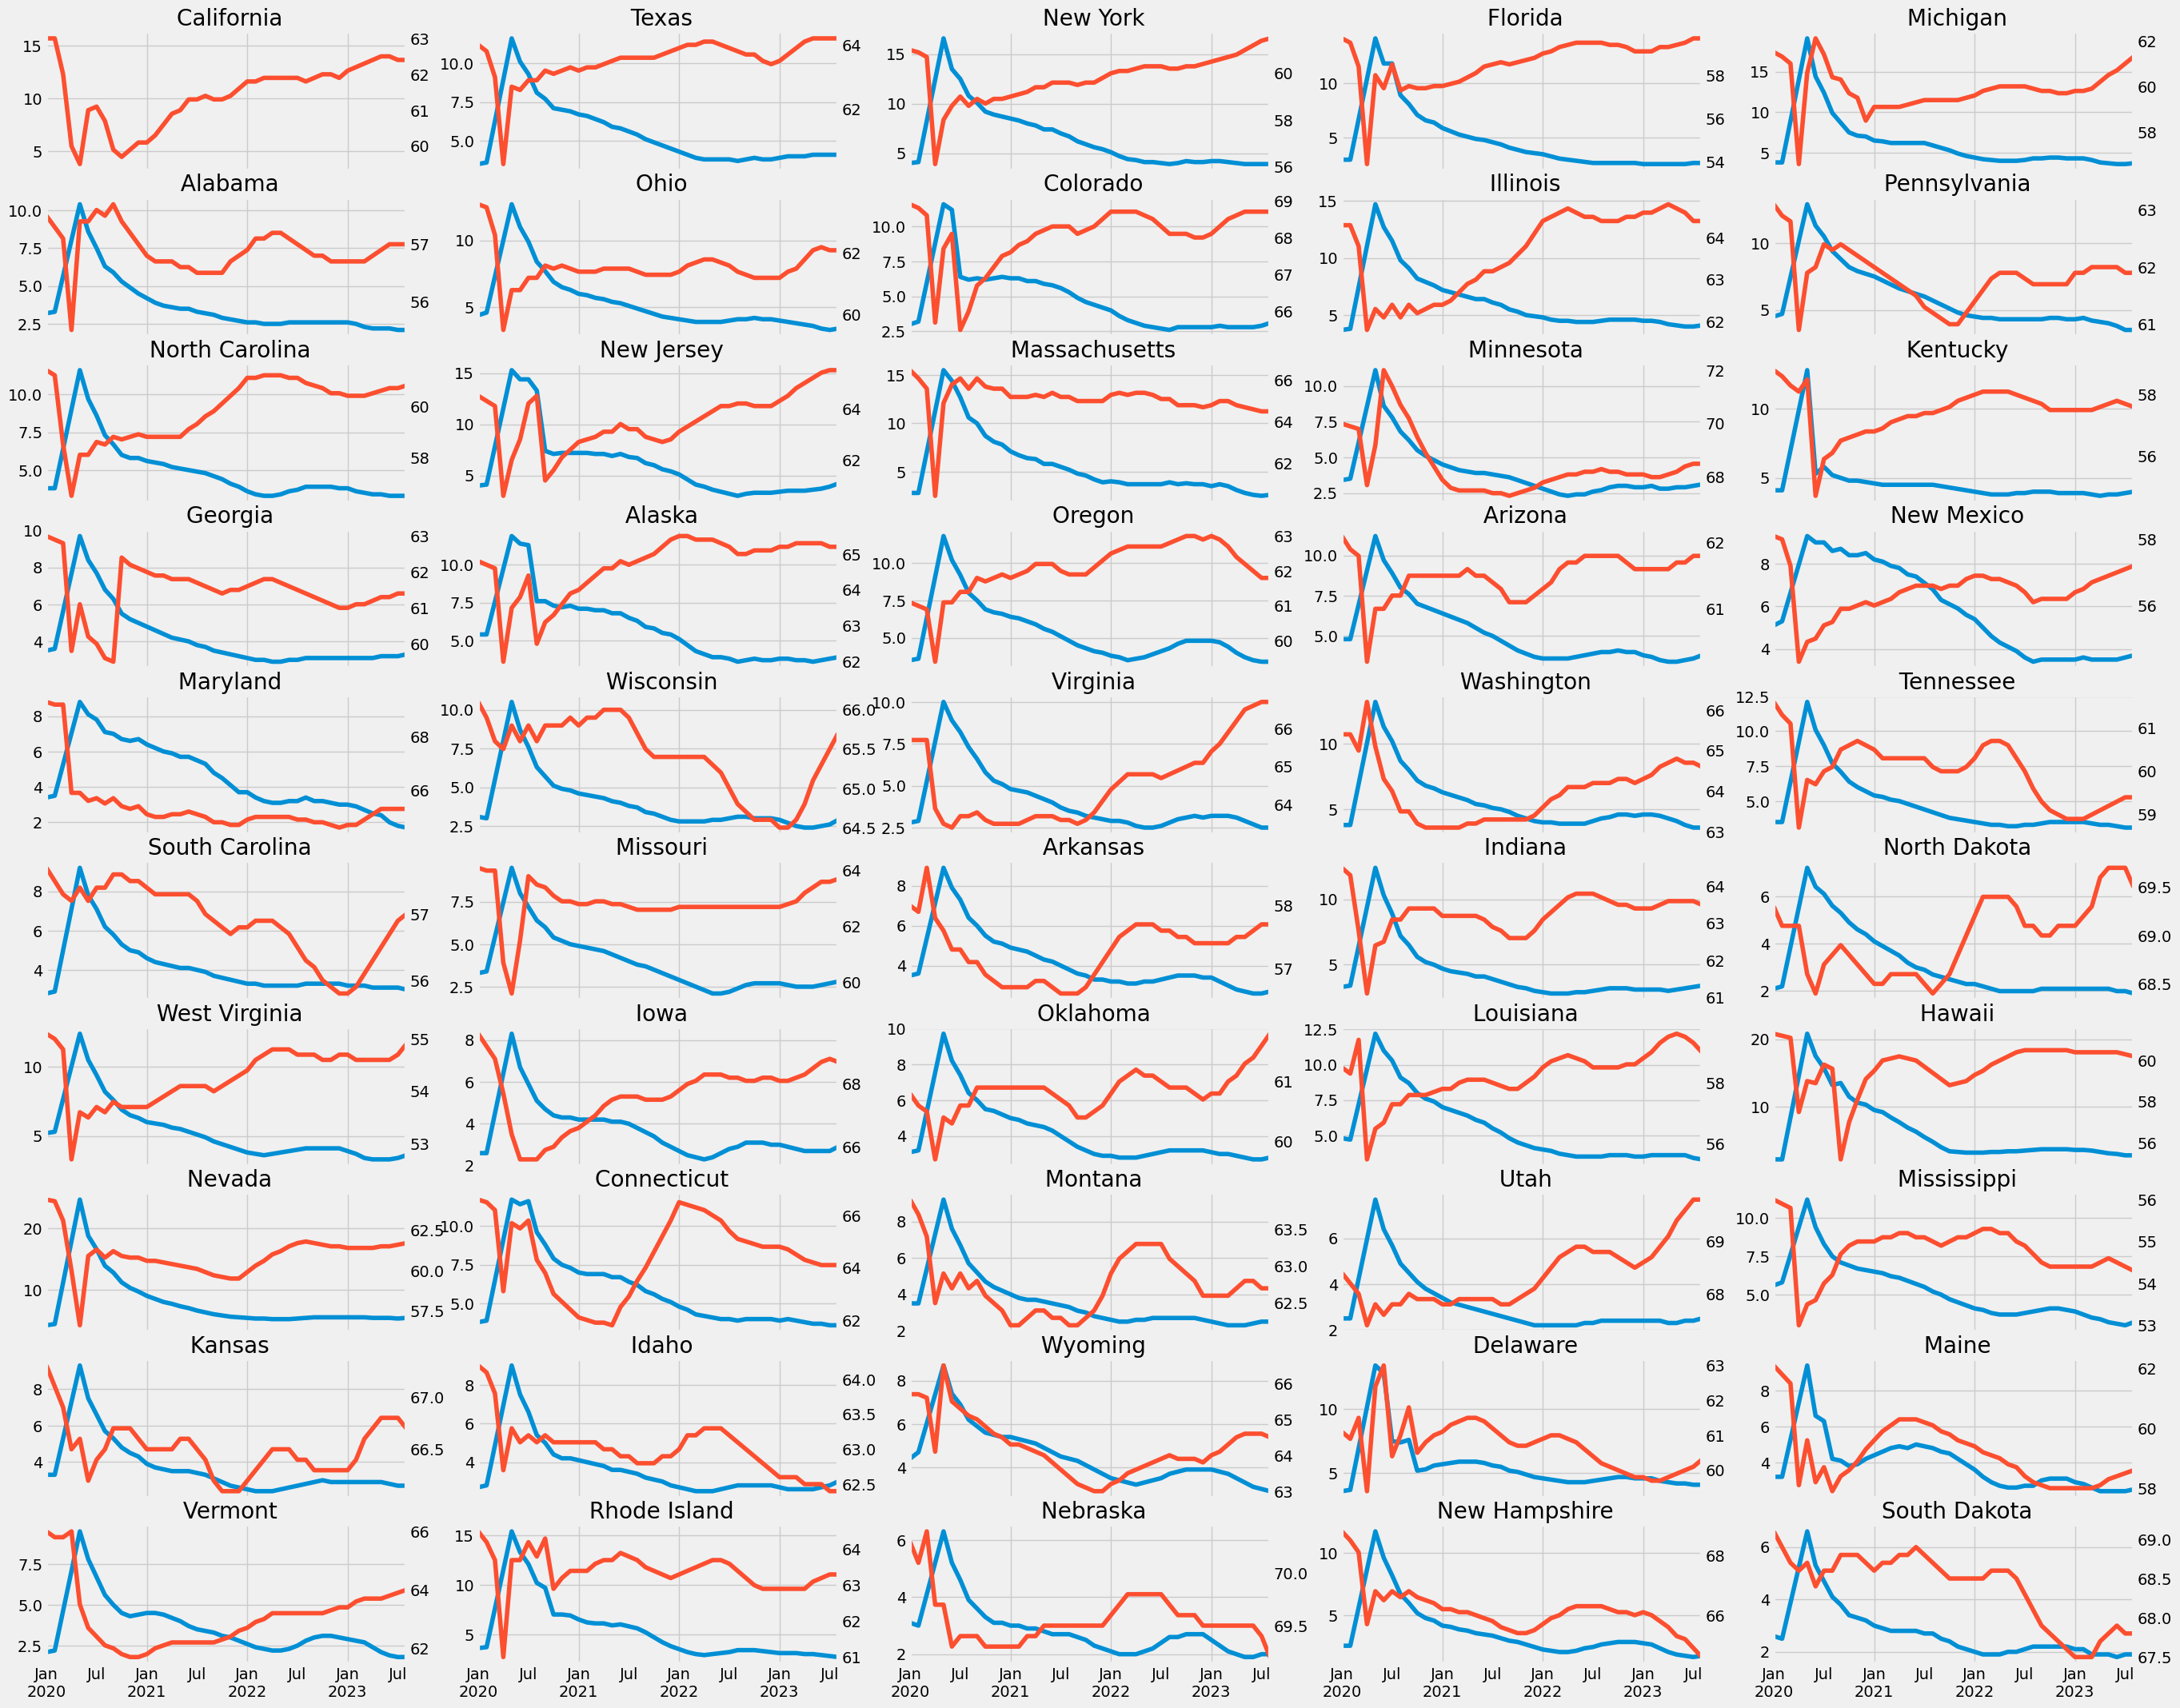

In [34]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_states.columns:
    if state in [" The District Of Columbia"," the District of Columbia", " Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemployment_states.query('index >= 2020 and index < 2024')[state] \
        .plot(ax=axs[i], label='Unemployment')
    Participation_states.query('index >= 2020 and index < 2024')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

In [ ]:
Participation_states.columns